In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from aging.size_norm.util import load_model_parameters
from aging.plotting import format_plots, figure

In [2]:
format_plots()

In [3]:
scan_path = Path('/n/groups/datta/win/longtogeny/size_norm/models/bottleneck_optimization_00')

In [30]:
metrics = list(scan_path.glob('stage_01/**/metrics.csv'))
results = load_model_parameters(metrics)
results['log_init_channel'] = np.log2(results['init_channel'])
results = results.groupby('file').apply(lambda x: x.loc[x['epoch'].idxmax()]).reset_index(drop=True)
results = results.query('epoch > 170')

<Axes: xlabel='bottleneck', ylabel='val_mse'>

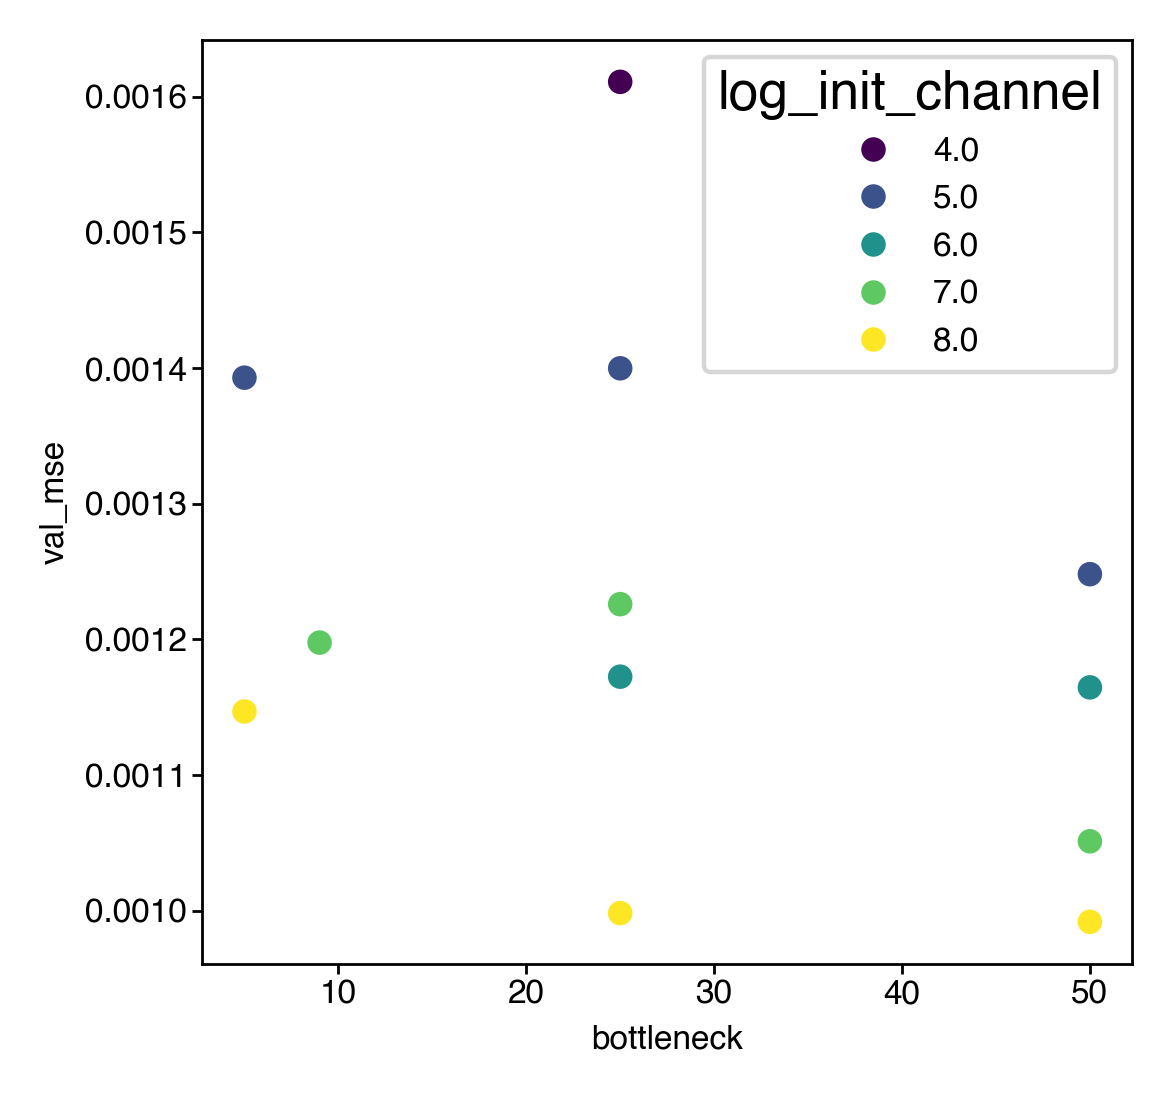

In [31]:
sns.scatterplot(data=results.query('arch == "ae"'), x='bottleneck', y='val_mse', hue='log_init_channel', palette='viridis', )

In [38]:
results['combined'] = (results['val_mse'] * (results['arch'] == "ae")).fillna(0) + (results['vae_val_mse'] * (results['arch'] == 'vae')).fillna(0)

<Axes: xlabel='bottleneck', ylabel='combined'>

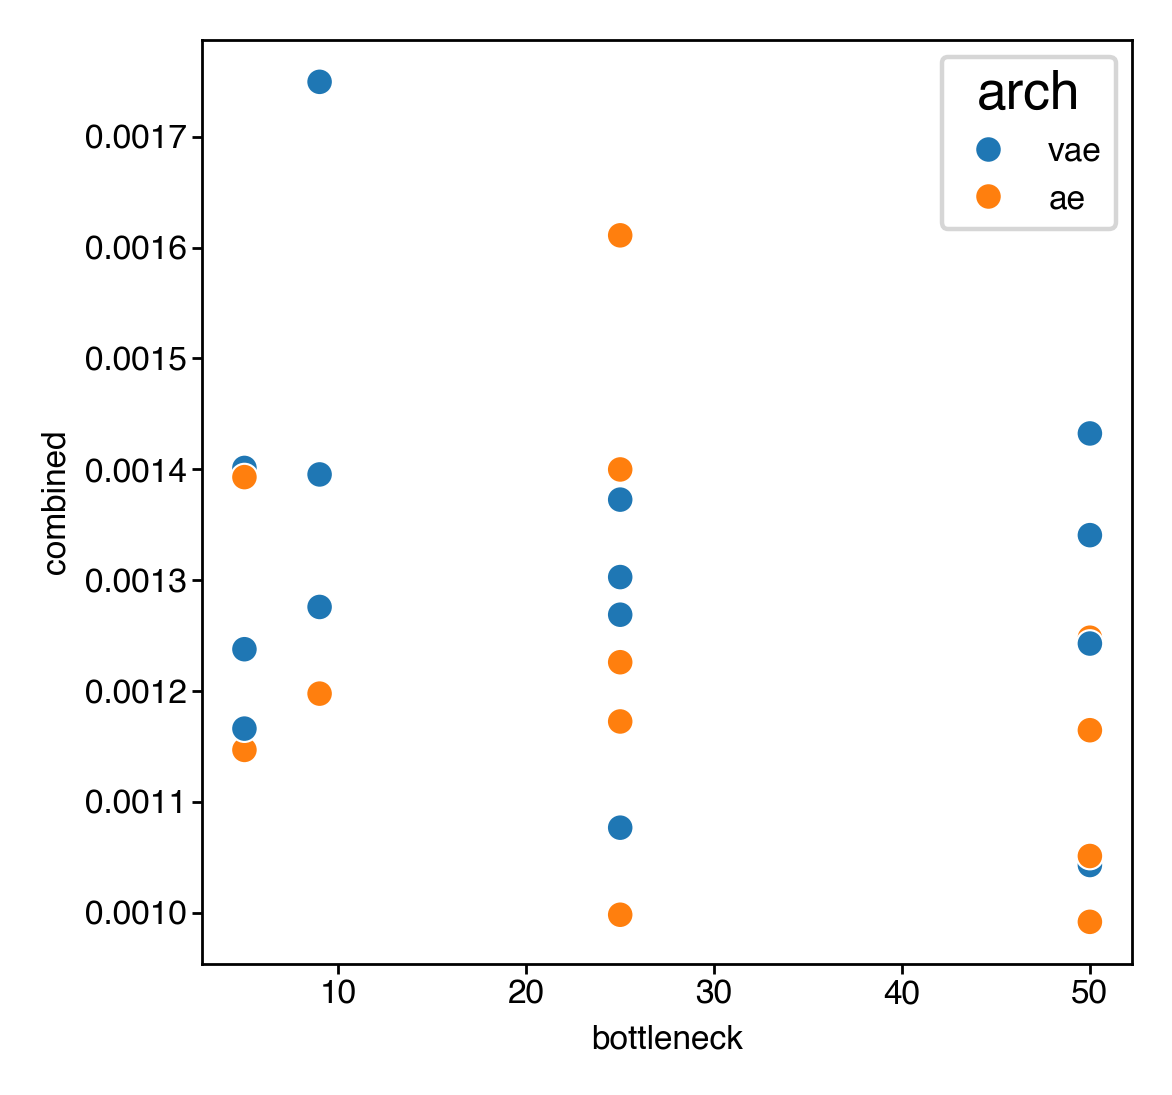

In [40]:
sns.scatterplot(data=results, x='bottleneck', y='combined', hue='arch')

<Axes: xlabel='log_init_channel', ylabel='combined'>

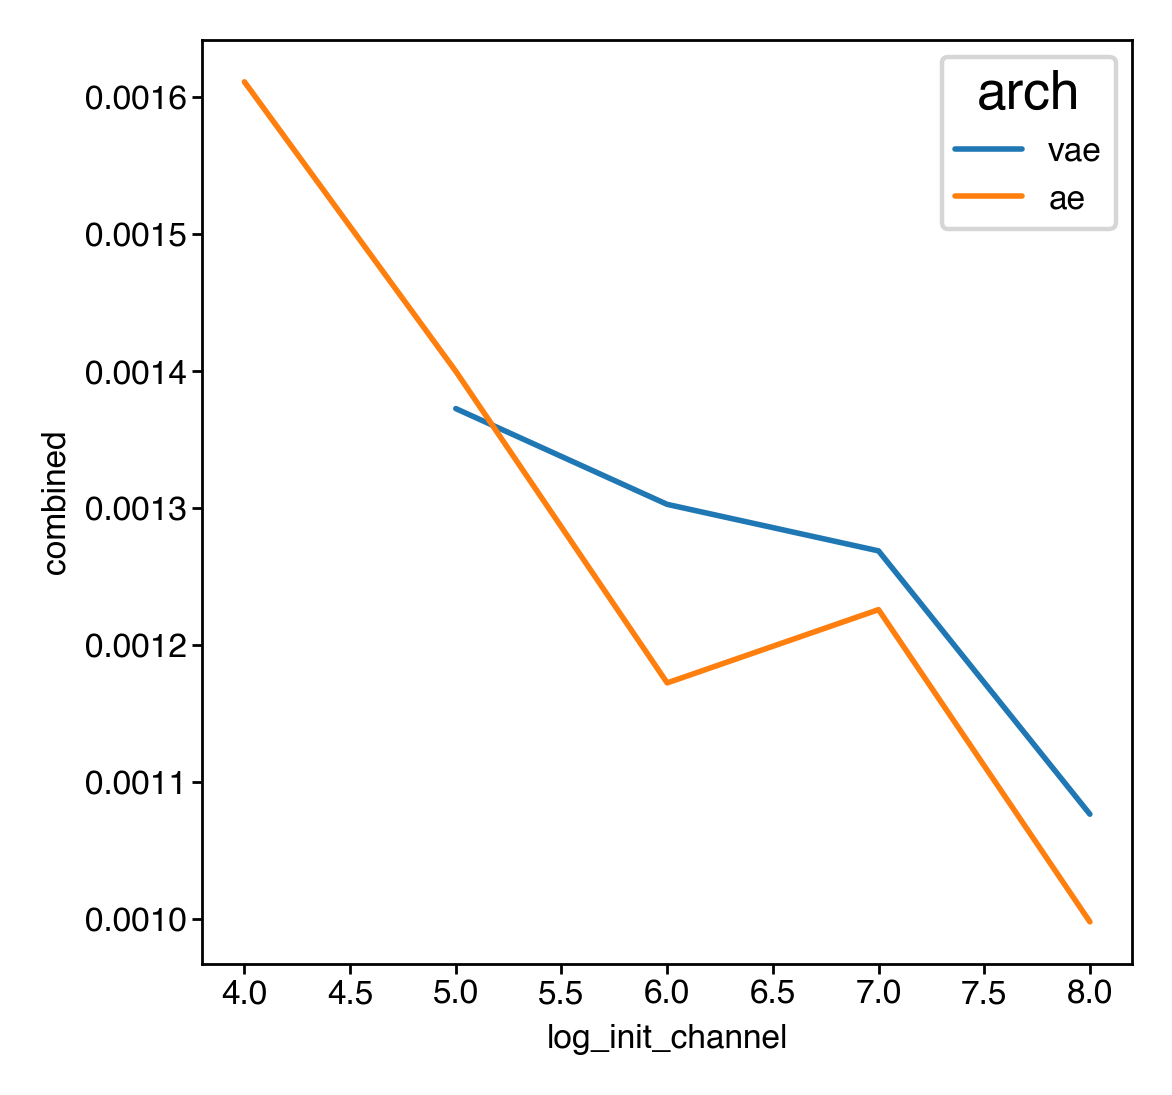

In [41]:
sns.lineplot(data=results.query('bottleneck == 25'), x='log_init_channel', y='combined', hue='arch')

In [44]:
results.query('arch == "vae" & bottleneck == 25 & log_init_channel == 8')['file'].iloc[0]

'/n/groups/datta/win/longtogeny/size_norm/models/bottleneck_optimization_00/stage_01/0d485951-8f69-4824-849d-fdb8b392ae6d/model.pt'

In [45]:
results.query('arch == "ae" & bottleneck == 25 & log_init_channel == 8')['file'].iloc[0]

'/n/groups/datta/win/longtogeny/size_norm/models/bottleneck_optimization_00/stage_01/67ef154f-d77b-4fc7-b06e-bb8c70f7d4aa/model.pt'